# Análisis para Showz

Showz es una empresa de <span style="color: gold;">**venta de entradas de eventos.**</span>

## Objetivo:
Optimizar los gastos del departamento de marketing

### Objetivos específicos:
- Identificar cómo los clientes usan el servicio

- Cuándo empiezan a comprar

- Cuánto dinero aporta cada cliente a la compañía (LTV)

- Cuándo los ingresos cubren el costo de adquisición de los clientes (ROM

## Pasos a seguir
1) Preparación de datos (cargar y limpiar datos)
2) Elaborar informes (gráficos para diferentes dispositivos y fuentes de anuncios y cambio con el tiempo)

    **Informe de visitas**
    * Calcular el DAU, WAU y MAU
    * Sesiones por día
    * Duración de la sesión (ASL)
    * Tasa de retención

    **Informe de ventas**
	* Tiempo entre el registro y la conversión
	* Número de pedidos durante un periodo
	* Tamaño promedio de compra
	* LTV

    **Informe de gastos**
    * ¿Cuánto dinero se gastó?
    * Costo de adquisición de clientes (CAC) para cada fuente
    * Rentabilidad de la inversión (ROMI)

3) Conclusión sobre la inversión en marketing:
* ¿Qué fuentes/plataformas recomendarías?
* ¿en qué métricas te enfocaste? ¿Por qué?
* ¿Qué conclusiones sacaste después de encontrar los valores métricos?

## Diccionario de datos
**Visits** (registros de visitas al sitio web)
* ``uid``: identificador único del usuario
* ``device``: dispositivo del usuario
* ``start ts``: fecha y hora de inicio de la sesión
* ``end ts``: fecha y hora de término de la sesión
* ``source id``: identificador de la fuente de anuncios de la que proviene el usuario

**Orders** (pedidos)
* ``uid``: identificador único del usuario que realiza un pedido
* ``buy ts``: fecha y hora del pedido
* ``revenue``: el ingreso de Showz por el pedido

**Costs** (gastos de marketing)
* ``source_id``: identificador de la fuente de anuncios
* ``dt``: fecha
* ``costs``: gastos en esta fuente de anuncios en este día

In [1]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualización general de los datos

In [2]:
# importar los datasets
visits = pd.read_csv('visits_log_us.csv')
orders = pd.read_csv('orders_log_us.csv')
costs = pd.read_csv('costs_us.csv')

In [3]:
# información de 'visits'
visits.info()
print('\n', visits.sample(5))
print('\n', 'Hay', visits.duplicated().sum(), 'valores duplicados')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

          Device               End Ts  Source Id             Start Ts  \
339601  desktop  2017-10-21 22:32:00          4  2017-10-21 22:31:00   
116146  desktop  2018-05-17 12:15:00          5  2018-05-17 12:11:00   
98011   desktop  2017-11-13 19:35:00          3  2017-11-13 19:21:00   
158608  desktop  2017-10-10 11:43:00          3  2017-10-10 10:51:00   
204849  desktop  2017-06-16 21:53:00          5  2017-06-16 21:26:00   

                        Uid  
339601  3410293487877099177  
116146  2474851275351235843  
98011    82067940169080

In [4]:
# información general de 'orders'
orders.info()
print('\n', orders.sample(5))
print('\n', 'Hay', orders.duplicated().sum(), 'valores duplicados')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

                     Buy Ts  Revenue                   Uid
24860  2017-12-19 11:21:00     1.78   7017258868617430307
41172  2018-03-22 15:28:00     4.37  14775415436064286310
5297   2017-08-13 22:58:00     2.44   4576023971558012282
45375  2018-04-24 20:52:00    14.24   2135694231046499268
28713  2018-01-09 18:25:00     1.47   1900670792544103436

 Hay 0 valores duplicados


In [5]:
# información general de 'costs'
costs.info()
print('\n', costs.sample(5))
print('\n', 'Hay', costs.duplicated().sum(), 'valores duplicados')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

       source_id          dt   costs
764           3  2017-07-09  291.75
230           1  2018-01-17   52.93
212           1  2017-12-30   56.74
1063          3  2018-05-06  148.85
776           3  2017-07-21  410.71

 Hay 0 valores duplicados


### Comentario
En ninguno de los DataFrames hay valores duplicados ni ausentes, solo hay que realizar algunas modificaciones en los nombres de las columnas y algunos tipos de datos.

* **costs**
  * Convertir “dt” a formato fecha
* **orders**
  * Convertir “buy ts” a formato fecha
  * Convertir nombres de las columnas
* **visits**
  * Convertir “end ts” y “start ts” a formato fecha
  * Convertir nombres de las columnas


# Limpieza de datos

In [6]:
# formato nombre de columnas
orders.columns = orders.columns.str.replace(' ', '_').str.lower()
visits.columns = visits.columns.str.replace(' ', '_').str.lower()


In [7]:
# manejo de fechas
costs['dt'] = pd.to_datetime(costs['dt'])
orders['buy_ts'] = pd.to_datetime(orders['buy_ts'])
visits['end_ts'] = pd.to_datetime(visits['end_ts'])
visits['start_ts'] = pd.to_datetime(visits['start_ts'])


# Informe de visitas

In [8]:
# obtener día, semana y mes de la sesión
visits['session_date'] = visits['start_ts'].dt.date
visits['session_week'] = visits['start_ts'].dt.isocalendar().week
visits['session_month'] = visits['start_ts'].dt.month_name()
visits['session_year'] = visits['start_ts'].dt.isocalendar().year

In [9]:
# duración por sesión en segundos
visits['duration'] = (
    visits['end_ts'] - visits['start_ts']
).dt.seconds

# se excentan las sesiones con duración de 0 segundos
visit_report = visits[visits['duration'] > 0]

In [10]:
# DAU, WAU, MAU
dau = (
    visit_report.groupby(['session_year', 'session_date'])
    .agg({'uid':'nunique'})
    .mean()
    .round()
    .astype(int)
)

wau = (
    visit_report.groupby(['session_year', 'session_week'])
    .agg({'uid':'nunique'})
    .mean()
    .round()
    .astype(int)
)

mau = (
    visit_report.groupby(['session_year', 'session_month'])
    .agg({'uid':'nunique'})
    .mean()
    .round()
    .astype(int)
)

# factor de adherencia de los usuarios
sticky_factor = (dau / mau) * 100
sticky_factor = sticky_factor.round().astype(int)

print(f'DAU {dau.iloc[0]} usuarios')
print(f'WAU {wau.iloc[0]} usuarios')
print(f'MAU {mau.iloc[0]} usuarios')
print(f'Factor de adherencia de los usuarios {sticky_factor.iloc[0]}%')

DAU 818 usuarios
WAU 5148 usuarios
MAU 20956 usuarios
Factor de adherencia de los usuarios 4%


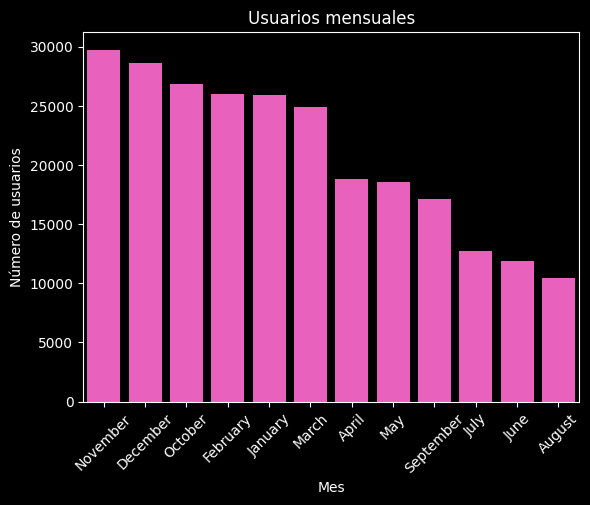

In [11]:
# usuarios mensuales
usuarios_per_month = (
    visit_report.groupby('session_month')
    .agg({'uid':'nunique'})
    .sort_values(by='uid', ascending=False)
)

# gráfico de barras: usuarios mensuales
plt.style.use('dark_background')
sns.barplot(usuarios_per_month,
            x='session_month',
            y='uid',
            color='#FF4AC4'
)
plt.title('Usuarios mensuales')
plt.xlabel('Mes')
plt.ylabel('Número de usuarios')
plt.xticks(rotation=45)
plt.show()

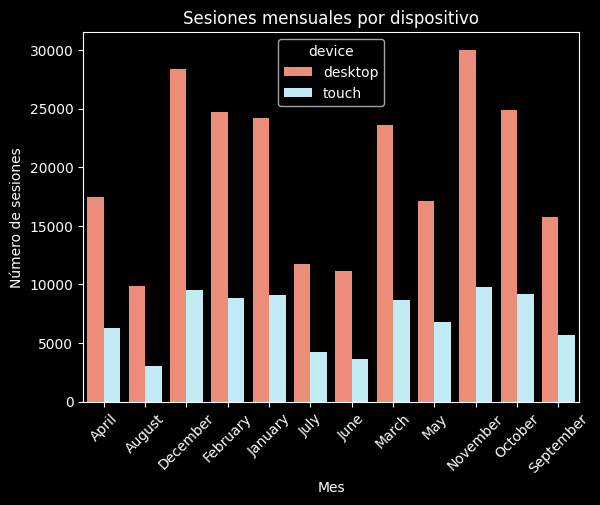

In [12]:
# sesiones mensuales por dispositivo
sessions_per_device = (
    visit_report.groupby(['session_month', 'device'])
    .agg({'uid':'count'})
    .reset_index()
)

# gráfico de barras: sesiones mensuales por dispositivo
sns.barplot(sessions_per_device,
            x='session_month',
            y='uid',
            hue='device',
            palette={
                'desktop':'#FF8066',
                'touch': '#B8F1FF'
            })
plt.title('Sesiones mensuales por dispositivo')
plt.xlabel('Mes')
plt.ylabel('Número de sesiones')
plt.xticks(rotation=45)
plt.show()

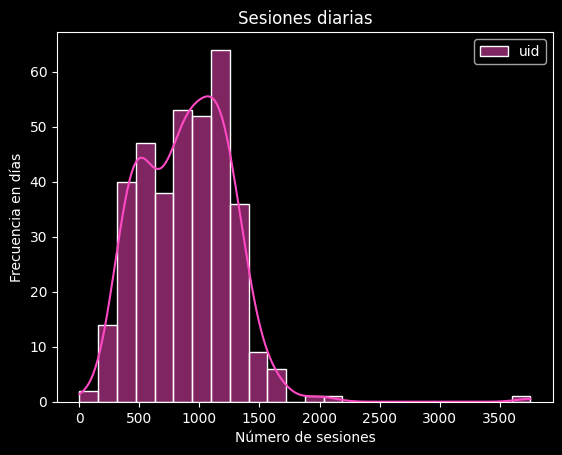

In [13]:
# número de sesiones diarias
sessions_per_day = (
    visit_report.groupby('session_date')
    .agg({'uid':'count'})
)

# histograma: número de sesiones diarias
sns.histplot(sessions_per_day,
             palette={'uid':'#FF4AC4'},
             kde=True)
plt.title('Sesiones diarias')
plt.xlabel('Número de sesiones')
plt.ylabel('Frecuencia en días')
plt.show()

In [14]:
# promedio de sesiones al día
mean_sessions = sessions_per_day.mean().round().astype(int)
# media de sesiones al día
median_sessions = sessions_per_day.median().round().astype(int)

print(f'Media {mean_sessions.iloc[0]} sesiones por día')
print(f'Mediana {median_sessions.iloc[0]} sesiones por día')

Media 889 sesiones por día
Mediana 898 sesiones por día


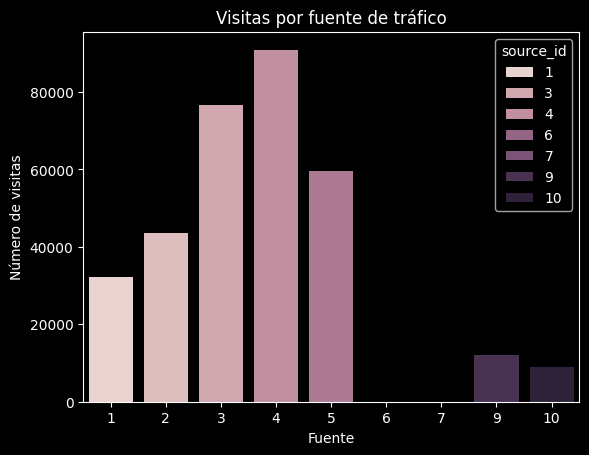

In [15]:
# número de visitas por fuente de tráfico
visit_per_source = (
    visit_report.groupby('source_id')
    .agg({'uid':'count'})
)

# gráfico de barras: número de visitas por fuente de tráfico
sns.barplot(visit_per_source,
            x='source_id',
            y='uid',
            hue='source_id'
)

plt.title('Visitas por fuente de tráfico')
plt.xlabel('Fuente')
plt.ylabel('Número de visitas')
plt.show()

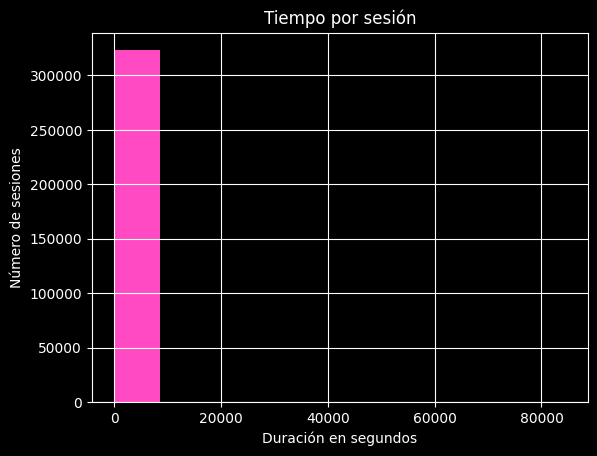

In [16]:
# histograma de duración por sesión
visit_report['duration'].hist(
    color='#FF4AC4'
)
plt.title('Tiempo por sesión')
plt.xlabel('Duración en segundos')
plt.ylabel('Número de sesiones')
plt.show()

In [17]:
# estadísticos descriptivos de 'duration'
duration = visit_report['duration'].describe()

# moda de la duración de las sesiones
asl = visit_report['duration'].mode()

print(duration)
print('\n',f'ASL {asl.iloc[0]} segundos')

count    323606.000000
mean        714.684623
std        1047.052806
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: duration, dtype: float64

 ASL 60 segundos


### Comentario
El reporte de visitas se compone del periodo 01 junio 2017 - 31 mayo 2018. El reporte contenía registros de sesiones con duración de 0 segundos, estos registros fueron omitidos ya que pudieron deberse a algún fallo del portal o conexión por parte del usuario, sin embargo, es de importancia comentarlo para confirmar cómo tratar estos registros.

Durante el periodo, mensualmente tuvimos 20,956 usuarios promedio, con un factor de adherencia del 4% (4/100 usuarios volvían a la plataforma), donde se puede apreciar que el dispositivo más usado por los usuarios es el “Desktop” y en su mayoría las sesiones duraron 60 segundos. Durante el último trimestre de 2017 se registró nuestra mayor cantidad de usuarios.

A lo largo del periodo 2017 - 2018 mantuvimos un rango de alrededor de 900 sesiones diarias, con variaciones menores entre días. Hubo pocas ocasiones en que llegamos a tener más del doble de sesiones, siendo particularmente el 24/11/17 el día con mayor número de sesiones.

La pricipal fuente de tráfico fue la 4 y la 3.


# Informe de ventas

In [18]:
# agregar 'order_date' y 'order_month' al df 'orders'
orders['order_date'] = orders['buy_ts'].dt.date
orders['order_month'] = orders['buy_ts'].dt.to_period('M')

# agregar primer mes de compra
orders['first_order'] = orders.groupby('uid')['order_month'].transform('min')

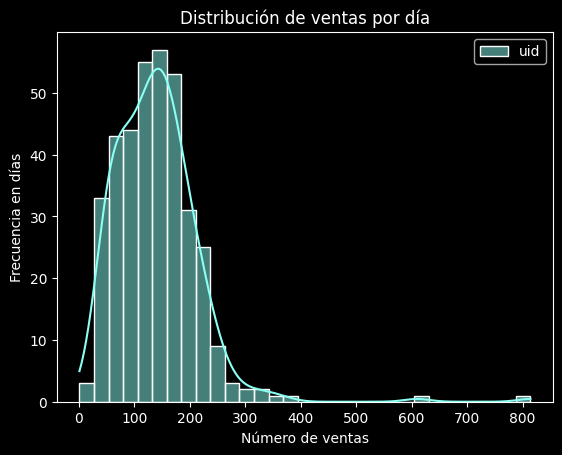

In [19]:
# número de ventas diarias
orders_per_day = (
    orders.groupby('order_date')
    .agg({'uid':'count'})
)

# histograma: número de ventas diarias
sns.histplot(orders_per_day,
             kde=True,
             palette={'uid':'#8AFFF3'})
plt.title('Distribución de ventas por día')
plt.xlabel('Número de ventas')
plt.ylabel('Frecuencia en días')
plt.show()

In [20]:
# promedio de ventas al día
mean_orders = orders_per_day.mean().round().astype(int)
# media de ventas al día
median_orders = orders_per_day.median().round().astype(int)

print(f'Media {mean_orders.iloc[0]} ventas por día')
print(f'Mediana {median_orders.iloc[0]} ventas por día')

Media 139 ventas por día
Mediana 136 ventas por día


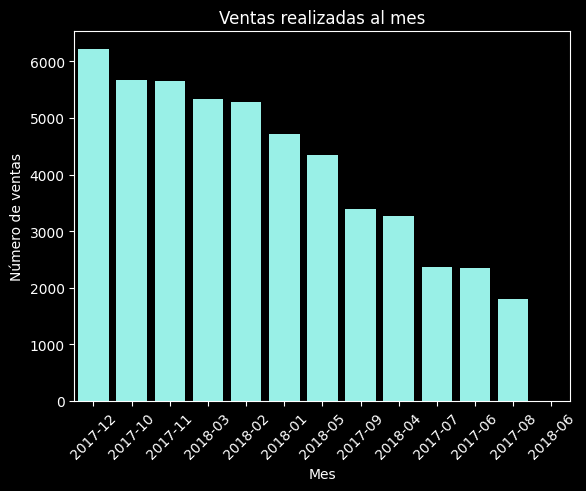

In [21]:
# número de ventas mensuales
orders_per_month = (
    orders.groupby('order_month')
    .agg({'uid':'count'})
    .reset_index()
    .sort_values(by='uid', ascending=False)
)

# gráfico de barras: número de ventas mensuales
sns.barplot(orders_per_month,
            x='order_month',
            y='uid',
            color='#8AFFF3')
plt.title('Ventas realizadas al mes')
plt.xlabel('Mes')
plt.ylabel('Número de ventas')
plt.xticks(rotation=45)
plt.show()

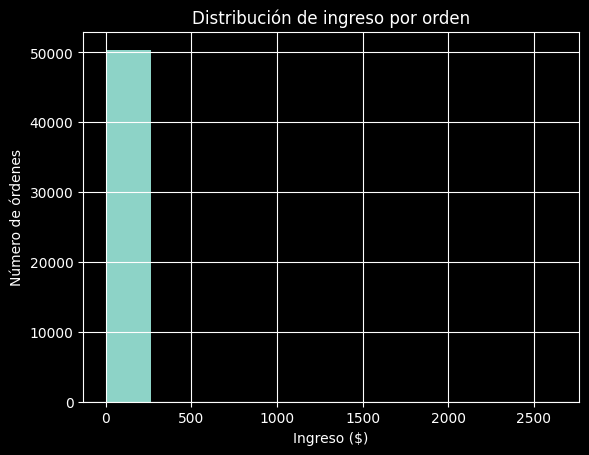

In [22]:
# histograma de ingreso por orden
orders['revenue'].hist()
plt.title('Distribución de ingreso por orden')
plt.xlabel('Ingreso ($)')
plt.ylabel('Número de órdenes')
plt.show()

In [23]:
# análisis descriptivo de 'revenue'
describe_revenue = orders['revenue'].describe()

# obtener moda de 'revenue'
mode_revenue = orders['revenue'].mode()

# obtener mediana de 'revenue'
median = orders['revenue'].median()

# total de gastos en marketing
total_revenue = orders['revenue'].sum()

print(describe_revenue)
print('\n', f'Moda ${mode_revenue.iloc[0]}')
print(f'Mediana ${median}')
print(f'Total de ventas ${total_revenue}')

count    50415.000000
mean         4.999647
std         21.818359
min          0.000000
25%          1.220000
50%          2.500000
75%          4.890000
max       2633.280000
Name: revenue, dtype: float64

 Moda $1.83
Mediana $2.5
Total de ventas $252057.19999999998


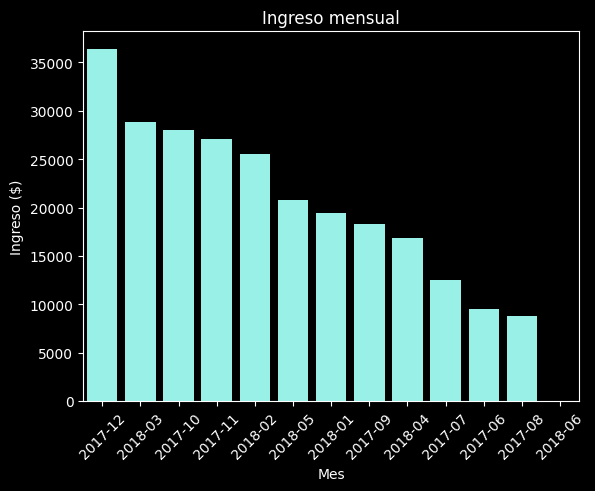

In [24]:
# ingreso mensual
revenue_per_month = (
    orders.groupby('order_month')
    .agg({'revenue':'sum'})
    .sort_values(by='revenue', ascending=False)
)

# gráfico de barras: ingreso mensual
sns.barplot(revenue_per_month,
            x='order_month',
            y='revenue',
            color='#8AFFF3')
plt.title('Ingreso mensual')
plt.xlabel('Mes')
plt.ylabel('Ingreso ($)')
plt.xticks(rotation=45)
plt.show()

In [25]:
# dataframe de primeras visitas de los usuarios
first_visits = (
    visit_report.groupby('uid')
    .agg({
        'start_ts':'min',
        'source_id':'first'
    })
    .reset_index()
)
first_visits['session_date'] = first_visits['start_ts'].dt.date
first_visits['session_month'] = (first_visits['start_ts']).dt.to_period('M')
first_visits.rename(columns={'start_ts':'first_session'}, inplace=True)

# dataframe de primeras compras de los usuarios
first_orders = (
    orders.groupby('uid')
    .agg({'buy_ts':'min'})
    .reset_index()
)
first_orders['buy_ts'] = first_orders['buy_ts'].dt.date

In [26]:
# dataframe 'conversion_report': junta las primeras visitas con las primeras compras
conversion_report = pd.merge(first_visits, first_orders, on='uid')
conversion_report.rename(columns={'buy_ts':'first_purchase'}, inplace=True)

# convertir a formato datetime
conversion_report['first_session'] = pd.to_datetime(conversion_report['first_session'])
conversion_report['first_purchase'] = pd.to_datetime(conversion_report['first_purchase'])

# obtener días transcurridos para la conversión
conversion_report['days_to_convert'] = (
    (conversion_report['first_purchase'] - conversion_report['first_session'])
    / np.timedelta64(1, 'D')
)
conversion_report['days_to_convert'] = conversion_report['days_to_convert'].round().astype(int)

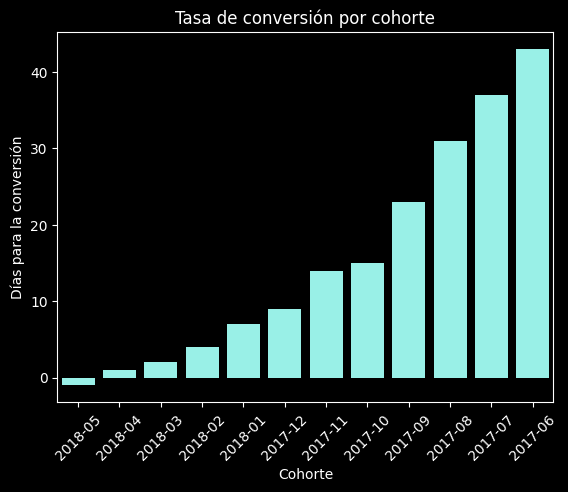

In [27]:
# tasa de conversión por cohorte mensual
conversion_per_cohort = (
    conversion_report.groupby('session_month')
    .agg({
        'days_to_convert':'mean',
        'uid':'nunique'
    })
    .round()
    .astype(int)
    .reset_index()
    .sort_values(by='days_to_convert')
)

# gráfico de barras: tasa de conversión por cohorte mensual
sns.barplot(conversion_per_cohort,
            x='session_month',
            y='days_to_convert',
            color='#8AFFF3')
plt.title('Tasa de conversión por cohorte')
plt.xlabel('Cohorte')
plt.ylabel('Días para la conversión')
plt.xticks(rotation=45)
plt.show()

In [28]:
# tasa de conversión por fuente de tráfico
conversion_per_source = (
    conversion_report.groupby('source_id')
    .agg({
        'days_to_convert':'mean',
        'uid':'nunique'
    })
    .round()
    .astype(int)
    .reset_index()
    .sort_values(by='days_to_convert')
)

# tabla: tasa de conversión por fuente de tráfico
conversion_per_source

,source_id,days_to_convert,uid
5,7,0,1
4,5,12,6758
7,10,12,1226
0,1,13,3761
2,3,14,9020
3,4,15,9690
1,2,20,4249
6,9,30,1376


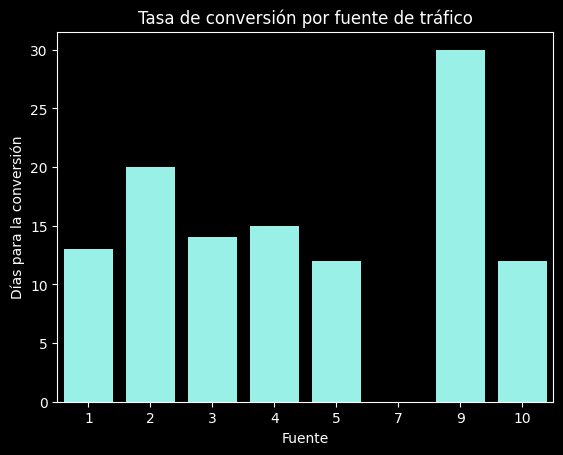

In [29]:
# gráfico de barras: tasa de conversión por fuente de tráfico
sns.barplot(conversion_per_source,
            x='source_id',
            y='days_to_convert',
            color='#8AFFF3')
plt.title('Tasa de conversión por fuente de tráfico')
plt.xlabel('Fuente')
plt.ylabel('Días para la conversión')
plt.show()

In [30]:
# elaborar cohorte
cohorts = (
    orders.groupby(['first_order', 'order_month'])
    .agg({'revenue':'sum'})
    .reset_index()
)
cohorts.rename(columns={'first_order':'cohort'}, inplace=True)

# calcular tamaño de las cohortes
cohort_size = (
    orders.groupby('first_order')
    .agg({'uid':'nunique'})
    .reset_index()
)
cohort_size.rename(columns={'uid':'users_cohort'}, inplace=True)

In [31]:
# df de cohortes
cohorts = cohorts.merge(cohort_size, left_on='cohort', right_on='first_order')

# calcular 'cohort_life'
cohorts['cohort_life'] = (cohorts['order_month'] - cohorts['first_order']).apply(lambda x: x.n)

# calcular el 'ltv'
cohorts['ltv'] = cohorts['revenue'] / cohorts['users_cohort']

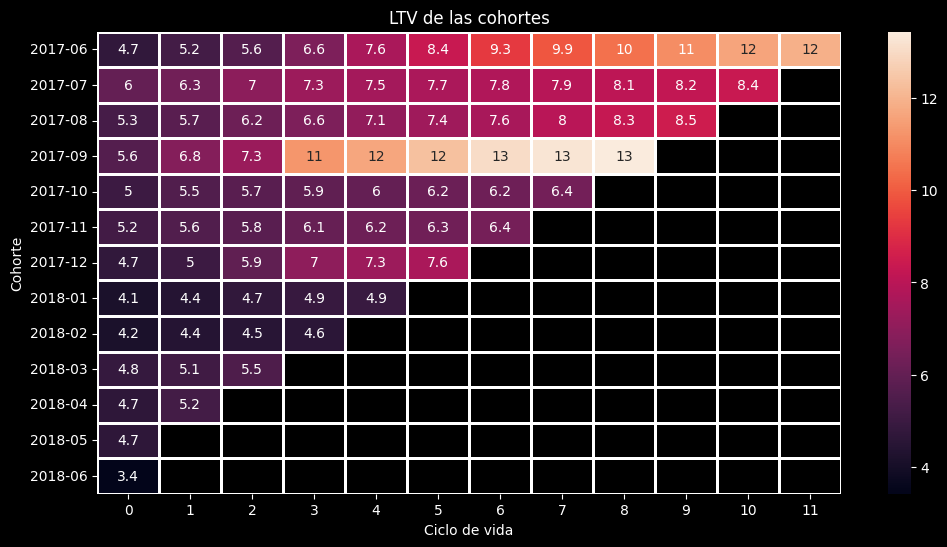

In [32]:
# reporte de 'ltv' para el periodo
report_ltv = cohorts.pivot_table(
    index='cohort',
    columns='cohort_life',
    values='ltv',
    aggfunc='sum'
).cumsum(axis=1)

# heatmap: reporte de 'ltv' de las cohortes
plt.figure(figsize=[12, 6])
sns.heatmap(report_ltv,
            annot=True,
            linewidths=1,
            linecolor='white')
plt.title('LTV de las cohortes')
plt.xlabel('Ciclo de vida')
plt.ylabel('Cohorte')
plt.show()

In [33]:
# ltv promedio 
mean_ltv = report_ltv.mean(axis=0).mean()

print(f'Media de ltv {mean_ltv}')

Media de ltv 8.053762588882604


### Comentario
Durante el periodo, las ventas diarias se estabilizaron alrededor de las 140, con variaciones menores entre días, siendo el último trimestre del 2017 el que presenta mayor número de pedidos. El ingreso promedio por ticket se encontraba en torno a $1.83, con un total de ventas de $252,057 en el periodo, colocándose diciembre como el mes con mayor ingreso ($36,389).

En cuanto a tasa de conversión, esta fue mayor en las cohortes de marzo, abril y mayo (2018) ya que a partir de la primera visita del usuario transcurrieron menos de 3 días para que realizara su primera compra. En lo que respecta a las fuentes de tráfico, 4, 3 y 5 tuvieron mejor tasa de conversión al igual que mayor cantidad de usuarios.

Al realizar un análisis de cohortes, se encuentra que el ingreso promedio por cliente (LTV) mantiene un ritmo de crecimiento sólido, sin embargo, las cohortes de agosto y septiembre mostraron un mayor crecimiento. Aunque es de destacar que la corte de septiembre mostró un mayor rendimiento a partir de su 4° mes.

# Informe de gastos

In [34]:
# obtener periodo (mes)
costs['month'] = costs['dt'].dt.to_period('M')

In [35]:
# total de gastos en marketing
total_cost = costs['costs'].sum()

print(f'Total de gastos ${total_cost}')

Total de gastos $329131.62


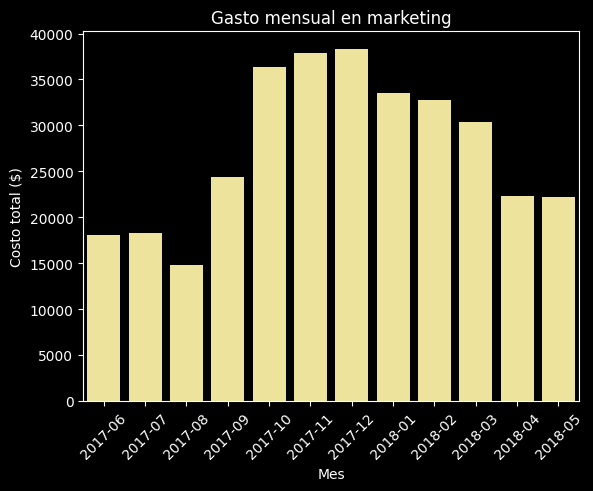

In [36]:
# gasto mensual en marketing
cost_per_month = (
    costs.groupby('month')
    .agg({'costs':'sum'})
)

# gráfico de barras: gasto mensual en marketing
sns.barplot(cost_per_month,
            x='month',
            y='costs',
            color='#FAED8F')
plt.title('Gasto mensual en marketing')
plt.xlabel('Mes')
plt.ylabel('Costo total ($)')
plt.xticks(rotation=45)
plt.show()

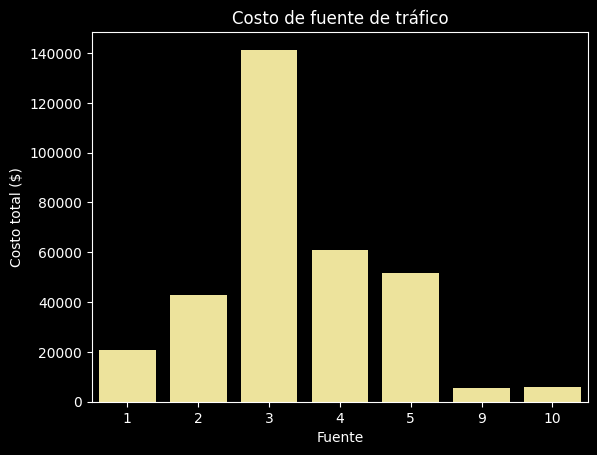

In [37]:
# costo de cada fuente de tráfico
cost_per_source = (
    costs.groupby('source_id')
    .agg({'costs':'sum'})
)

# gráfico de barras: costo de cada fuente de tráfico
sns.barplot(cost_per_source,
            x='source_id',
            y='costs',
            color='#FAED8F')
plt.title('Costo de fuente de tráfico')
plt.xlabel('Fuente')
plt.ylabel('Costo total ($)')
plt.show()

In [38]:
# usuarios nuevos por fuente de tráfico
first_visits_source = (
    first_visits.groupby('source_id')
    .agg({'uid':'nunique'})
)

# df reporte de gastos: se agrega a 'costs' el número de usuarios por fuente de tráfico
costs_report = costs.join(first_visits_source, on='source_id')
costs_report.rename(columns={'uid':'attracted_users'}, inplace=True)

In [39]:
# calcular costo mensual de fuente de tráfico
costs_report['month_costs'] = (
    costs_report.groupby(['source_id', 'month'])['costs']
    .transform('sum')
)

# calcular CAC (costo de adquisición por usuario)
costs_report['cac'] = costs_report['month_costs'] / costs_report['attracted_users']

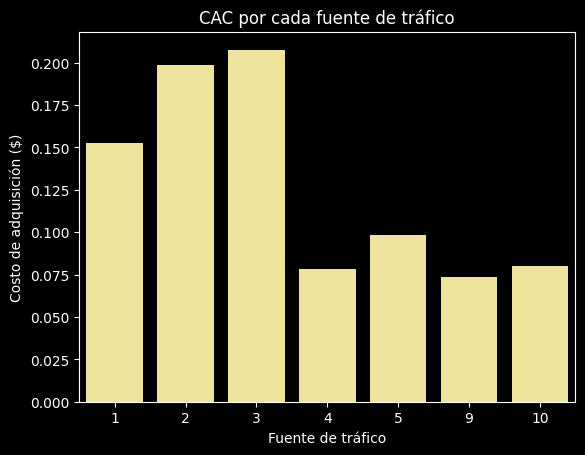

In [40]:
# cac por fuente de tráfico
cac_per_source = (
    costs_report.groupby('source_id')
    .agg({'cac':'mean'})
)

# gráfico de barras: cac por fuente de tráfico
sns.barplot(cac_per_source,
            y='cac',
            x='source_id',
            color='#FAED8F')
plt.title('CAC por cada fuente de tráfico')
plt.xlabel('Fuente de tráfico')
plt.ylabel('Costo de adquisición ($)')
plt.show()

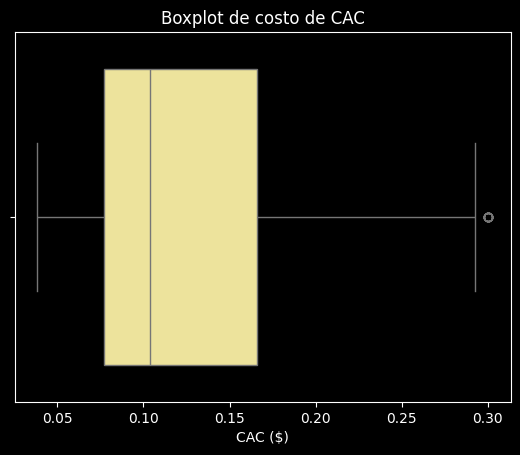

In [41]:
# boxplot: costo de adquisición 
sns.boxplot(costs_report,
            x='cac',
            color='#FAED8F'
)
plt.title('Boxplot de costo de CAC')
plt.xlabel('CAC ($)')
plt.show()

In [42]:
# análisis descriptivo de 'cac'
describe_cac = costs_report['cac'].describe()

# obtener moda de 'revenue'
mode_cac = costs_report['cac'].mode()

# obtener mediana de 'revenue'
median_cac = costs_report['cac'].median()

print(describe_cac)
print('\n', f'Moda ${mode_cac.iloc[0]}')
print(f'Mediana ${median_cac}')


count    2542.000000
mean        0.127034
std         0.068913
min         0.038384
25%         0.077031
50%         0.103522
75%         0.166016
max         0.300324
Name: cac, dtype: float64

 Moda $0.038384221818781976
Mediana $0.10352203333883479


In [43]:
# costo de adquisición mensual
cac_per_month = (
    costs_report.groupby('month')
    .agg({'cac':'sum'})
)

# se agrega al df de cohortes el cac mensual
cohorts = cohorts.join(cac_per_month, on='cohort')

# cálculo del retorno de inversión de marketing (ROMI)
cohorts['romi'] = cohorts['ltv'] / cohorts['cac']

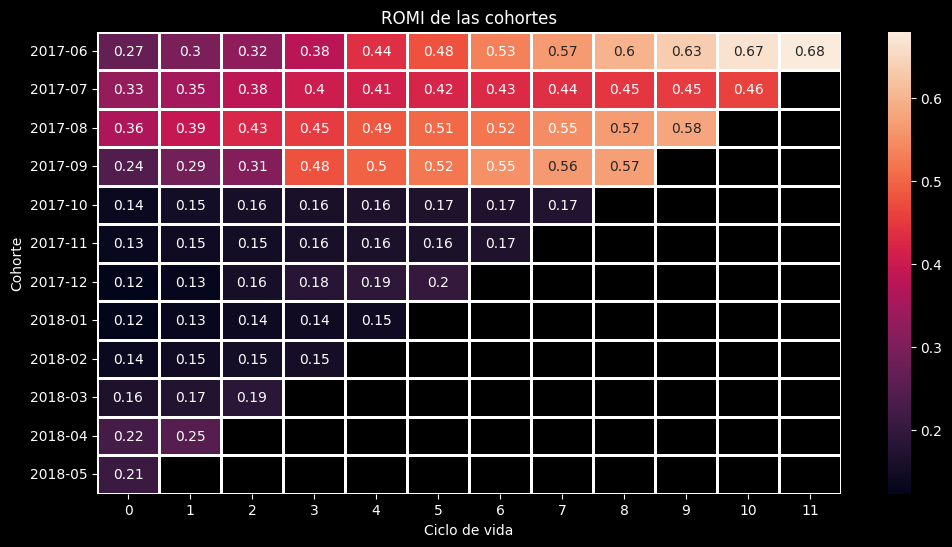

In [44]:
# reporte de retorno de inversión
romi_report = cohorts.pivot_table(
    index='cohort',
    columns='cohort_life',
    values='romi',
    aggfunc='mean'
).cumsum(axis=1)

# heatmap: reporte de retorno de inversión
plt.figure(figsize=[12, 6])
sns.heatmap(romi_report,
            annot=True,
            fmt='.2g',
            linewidths=1,
            linecolor='white'
)
plt.title('ROMI de las cohortes')
plt.ylabel('Cohorte')
plt.xlabel('Ciclo de vida')
plt.show()

In [45]:
# cohorte promedio
romi_report.mean(axis=0)

cohort_life
0     0.204760
1     0.223625
2     0.238120
3     0.279237
4     0.312078
5     0.351598
6     0.395222
7     0.457312
8     0.545387
9     0.555540
10    0.563736
11    0.680156
dtype: float64

In [46]:
# modelo de marketing para fuente 4
def marketing_model(marketing):  
    num_users = marketing / 0.79
    costs = num_users * 0.79
    revenue = num_users * 1.8
    return(revenue - costs)

for m in range(60000, 110000, 10000):
    print('Profit/loss: {} with a budget of {}'.format(marketing_model(m), m)) 

Profit/loss: 76708.86075949366 with a budget of 60000
Profit/loss: 89493.67088607597 with a budget of 70000
Profit/loss: 102278.48101265822 with a budget of 80000
Profit/loss: 115063.2911392405 with a budget of 90000
Profit/loss: 127848.10126582277 with a budget of 100000


### Comentario
El total de gastos en marketing del periodo fue de $329,131.62, donde el costo de adquisición promedio fue de $0.12. El último trimestre del 2017 fue el que presentó una mayor inversión, destacando las fuentes de tráfico 3 y 4.

En cuanto al CAC (costo de adquisición por usuario), las fuentes 2 y 3 fueron las más costosas, y las que representaron menor gasto por usuario fueron 4 y 5, esto se debe a que tuvieron un mayor ingreso de usuarios con respecto a lo que se invirtió.

Al analizar el ROMI se muestra que las cohortes de junio, agosto y septiembre mantienen un ritmo notable en el retorno de inversión.

# Conclusión del informe
De acuerdo con el análisis realizado para el periodo junio 2017 - mayo 2018 (12 meses), recomendaría disminuir el presupuesto destinado a la fuente de tráfico 3 y considerarlo para la fuente 4, o como segunda opción la fuente 5. Si bien las fuentes 3 y 4 atraen el mayor número de vistas y convierten de forma casi similar, el CAC es más elevado en la fuente 3, siendo más del doble que en la fuente 4. Además, el presupuesto de la fuente 3 representó el 43 % de los gastos, mientras que la fuente 4 representó solo el 18.5 %, siendo esta última la más rentable en vistas, conversión y costo de adquisición. Como herramienta adicional, se creó un pequeño modelo para proyectar la rentabilidad de la inversión en marketing para la fuente 4, en donde se muestra que con una inversión similar a la realizada para la fuente 3 se estaría estimando un ingreso de $127,848. Hasta ahora, tomando en cuenta un LTV de $8 y un CAC de $0.12, mantenemos un margen de beneficio por cliente de $7.88 y un ratio LTV:CAC de aproximadamente 66.7:1.

Aunado a ello, recomendaría eliminar las fuentes 9 y 10, ya que son las que generan menor número de visitas y menor tasa de conversión. Esto se traduciría en un ahorro de $11,339.98. De acuerdo con el análisis del ROMI, manteniendo el crecimiento que llevamos hasta ahora, nos encontraríamos llegando al punto de equilibrio para el segundo año.
Como comentarios adicionales, quiero destacar que casi todos nuestros usuarios emplean la computadora para acceder a nuestro sitio, y el tiempo de sesión se encuentra en un rango de 60 segundos. Sugiero revisar el embudo de producto para el cliente y el mapa de scroll para entender mejor la actividad de los usuarios, y considerar si sería conveniente realizar algún cambio en el sitio para mejorar la experiencia durante la sesión.

También sería de mucho valor revisar:

- los eventos llevados a cabo en el último trimestre de 2017, ya que fue el periodo con mayor actividad de visitas y compras
- si hubo algún evento cercano o promoción para las cohortes de marzo, abril y mayo, ya que estas fueron las que tuvieron una tasa de conversión inferior a los tres días
- si la cohorte de septiembre recibió algún beneficio en su cuarto mes, ya que se observa un aumento en el LTV de los usuarios

Estos datos aportarían un gran valor para identificar tendencias u oportunidades que beneficien el rendimiento de la cohorte o la atracción de nuevos usuarios.